In [0]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize, rosen, rosen_der
import time

# Problem 1
## a

In [0]:
x = np.arange(1, 25)
y = np.array([75, 77, 76, 73, 69, 68, 63, 59, 57, 55, 54, 52, 50, 50, 49, 49, 49, 50, 54, 56, 59, 63, 67, 72])
x0 = [1, 1, 1, 80]

Polynomial coefficients: [ 9.18228205e-03 -1.59401226e-01 -1.75016904e+00  8.02379722e+01]


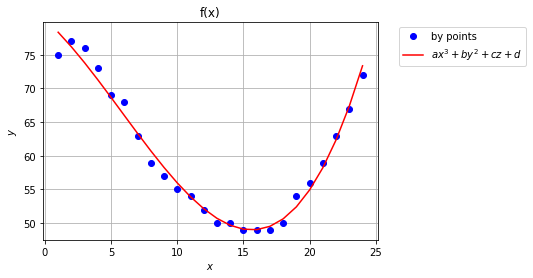

In [0]:
f = lambda abc, xk, yk: np.sum((abc[0]*xk**3 + abc[1]*xk**2 + abc[2]*xk + abc[3] - yk)**2)
f_plot = lambda abc, xk: abc[0]*xk**3 + abc[1]*xk**2 + abc[2]*xk + abc[3]
start_time_1 = time.time()
res = minimize(f, x0, args=(x, y), tol=1e-6)
end_time_1 = time.time()

print ('Polynomial coefficients:', res.x)
plt.plot(x, y, 'bo', label='by points')
plt.plot(x, f_plot(res.x, x), '-r', label=r'$ax^3+by^2+cz+d$')
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.title('f(x)');
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.grid(True)

## b

In [0]:
xt = x.reshape(-1, 1)
yt = y.reshape(-1, 1)

A = np.hstack((xt**3, xt**2, xt, np.ones_like(xt)))
At = A.transpose()
np.linalg.solve(At@A, At@yt)

array([[ 9.18550049e-03],
       [-1.59521638e-01],
       [-1.74894429e+00],
       [ 8.02351779e+01]])

In [0]:
np.linalg.inv(At@A)@(At@yt)

array([[ 9.18550049e-03],
       [-1.59521638e-01],
       [-1.74894429e+00],
       [ 8.02351779e+01]])

## c

In [0]:
np.linalg.inv(At@A)@(At@yt)

array([[ 9.18550049e-03],
       [-1.59521638e-01],
       [-1.74894429e+00],
       [ 8.02351779e+01]])

In [0]:
np.linalg.pinv(A)@yt

array([[ 9.18550049e-03],
       [-1.59521638e-01],
       [-1.74894429e+00],
       [ 8.02351779e+01]])

The solutions are equal

# Problem 2

## a

In [0]:
def newton(f, Df, x0, eps, max_iter, verbose=False):
    xn = x0
    en = []
    xnn = []
    for n in range(0, max_iter):
        en.append(xn)
        xnn.append(xn)
        fxn = f(xn)
        if abs(fxn) < eps:
            if verbose:
                print ('Root:', xn)
                print ('Found solution after', n, 'iterations.')
            en = np.array(en)
            en = np.abs(en-xn)
            return xn, en, xnn
        Dfxn = Df(xn)
        if Dfxn == 0:
            if verbose: print ('Zero derivative. No solution found.')
            return None, None, xnn
        xn = xn - fxn/Dfxn
    if verbose: print ('Exceeded maximum iterations. No solution found.')
    return None, None, xnn

Root: 1.0
Found solution after 11 iterations.


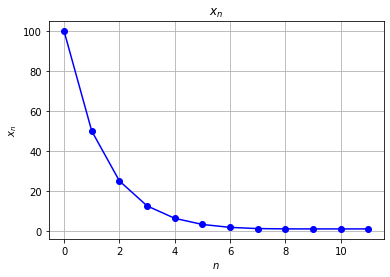

In [0]:
f = lambda x: x**2 - 1
df = lambda x: 2*x
root, en, xnn = newton(f, df, 100, 1e-10, 1000, True)

plt.plot(xnn, '-ob')
plt.xlabel(r'$n$')
plt.ylabel(r'$x_n$')
plt.title(r'$x_n$')
plt.grid(True)

## b

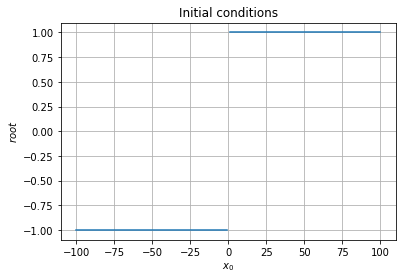

In [0]:
x = np.linspace(-100, 100, 201)
plt.plot(x, [newton(f, df, xk, 1e-10, 1000, False)[0] for xk in x]);
plt.grid(True)
plt.xlabel(r'$x_0$')
plt.ylabel(r'$root$')
plt.title('Initial conditions');

## c
When the starting point of iterations x0 is close enough to the desired minimum, the convergence rate of the Newton method is quadratic.

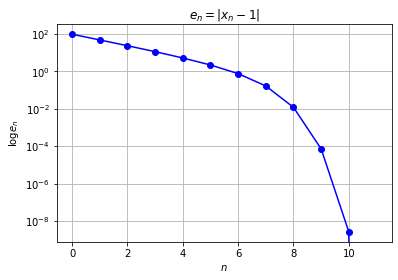

In [0]:
plt.plot(en, '-ob')
plt.xlabel(r'$n$')
plt.ylabel(r'$\log{e_n}$')
plt.title(r'$e_n = |x_n - 1|$')
plt.yscale('log')
plt.grid(True)

# Problem 3

## a
The iterations does not converge to anything:

Exceeded maximum iterations. No solution found.


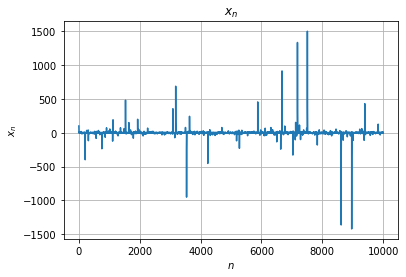

In [0]:
f = lambda x: x**2 + 1
Df = lambda x: 2*x
x, en, xnn = newton(f, Df, 100, 1e-8, 10000, True)
plt.plot(xnn)
plt.xlabel(r'$n$')
plt.ylabel(r'$x_n$')
plt.title(r'$x_n$')
plt.grid(True)

Let's try to converge from the points between -1000 and 1000:

In [0]:
found = False

for i in np.arange(-1000, 1000):
    if newton(f, Df, 2, 1e-8, 1000)[0]:
        print ('The root exists.')
        found = True
        break

if not found:
    print ('The root does not exist.')

The root does not exist.


## b

Exceeded maximum iterations. No solution found.


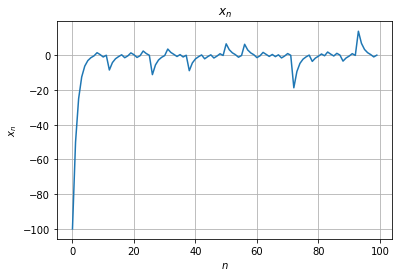

In [0]:
x, en, xnn = newton(f, Df, -100, 1e-8, 100, True)
plt.plot(xnn)
plt.xlabel(r'$n$')
plt.ylabel(r'$x_n$')
plt.title(r'$x_n$')
plt.grid(True)

Exceeded maximum iterations. No solution found.


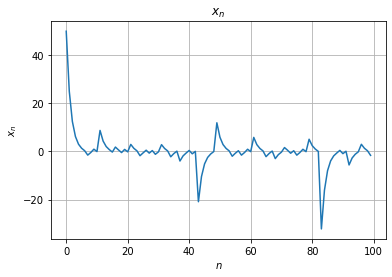

In [0]:
x, en, xnn = newton(f, Df, 50, 1e-8, 100, True)
plt.plot(xnn)
plt.xlabel(r'$n$')
plt.ylabel(r'$x_n$')
plt.title(r'$x_n$')
plt.grid(True)

Exceeded maximum iterations. No solution found.


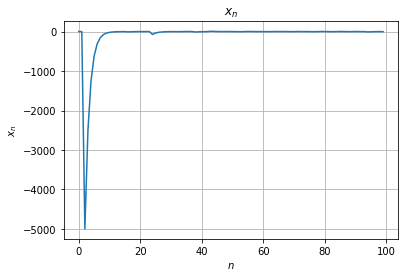

In [0]:
x, en, xnn = newton(f, Df, 1.0001, 1e-8, 100, True)
plt.plot(xnn)
plt.xlabel(r'$n$')
plt.ylabel(r'$x_n$')
plt.title(r'$x_n$')
plt.grid(True)

Exceeded maximum iterations. No solution found.


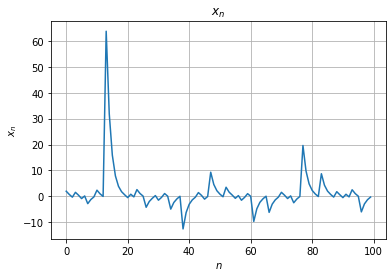

In [0]:
x, en, xnn = newton(f, Df, 2, 1e-8, 100, True)
plt.plot(xnn)
plt.xlabel(r'$n$')
plt.ylabel(r'$x_n$')
plt.title(r'$x_n$')
plt.grid(True)

## c
If we start the iterations in the complex plane, they will converge to the actual roots

Root: (2.8304201608422602e-14+1.0000000000000415j)
Found solution after 13 iterations.


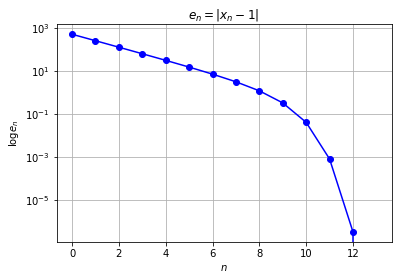

In [0]:
f = lambda x: x**2 + 1
Df = lambda x: 2*x
x, en, xnn = newton(f, Df, 10+523j, 1e-8, 100, True)

plt.plot(en, '-ob')
plt.xlabel(r'$n$')
plt.ylabel(r'$\log{e_n}$')
plt.title(r'$e_n = |x_n - 1|$')
plt.yscale('log')
plt.grid(True)

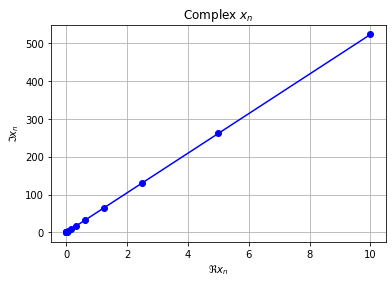

In [0]:
plt.plot([x.real for x in xnn], [x.imag for x in xnn], '-ob')
plt.xlabel(r'$\Re{x_n}$')
plt.ylabel(r'$\Im{x_n}$')
plt.title(r'Complex $x_n$')
plt.grid(True)

# Problem 4
## a

\begin{equation}
f = 2x^2 + 2xy + y^2 - x - 2y\\
f = \frac{1}{2} u^T Au - b^T u \\
\frac{\partial u^T Au}{\partial u} = (A+A^T)u\\
\frac{\partial b^Tu}{\partial u} = b\\
f' = \frac{1}{2} (A+A^T) u - b = 0\\
u = 2(A+A^T)^{-1} b\\
A = \begin{pmatrix}
4 & 2 \\
2 & 2
\end{pmatrix}\\
B = \begin{pmatrix}
1 \\
2
\end{pmatrix}\\
u = \begin{pmatrix}
-1/2 \\
3/2
\end{pmatrix}\\
f_{min} = f(-\frac{1}{2}, \frac{3}{2}) = -\frac{5}{4}\\
\end{equation}

Min: -1.24783185389246


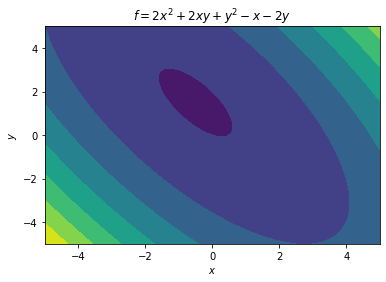

In [0]:
xlist = np.linspace(-5, 5, 100)
ylist = np.linspace(-5, 5, 100)
x, y = np.meshgrid(xlist, ylist)
f = 2*x**2 + 2*x*y + y**2 - x - 2*y
print("Min:", np.min(f))

plt.contourf(x, y, f)
plt.title(r'$f = 2x^2 + 2xy + y^2 - x - 2y$')
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.show()

## b

\begin{equation}
f' = (f'_x, f'_y)\\
(f'^{(n+1)}_x, f'^{(n+1)}_y)(f'^{(n)}_x, f'^{(n)}_y) = 0\\
(4x^{n+1} + 2y^{n+1} - 1; 2y^{n+1} + 2x^{n+1} - 2)(4x^n + 2y^n - 1; 2y^n + 2x^n - 2) = 0\\
(4x^{n+1} + 2y^{n+1} - 1)(4x^n + 2y^n - 1) + (2y^{n+1} + 2x^{n+1} - 2)(2y^n + 2x^n - 2) = 0\\
x^{n+1} = x^n - \tau f'_x = x^n - \tau (4x+2y-1)\\
y^{n+1} = y^n - \tau f'_y = y^n - \tau (2x+2y-2)\\
(4(x^n - \tau (4x+2y-1)) + 2(y^n - \tau (2x+2y-2)) - 1)(4x^n + 2y^n - 1) + (2(y^n - \tau (2x+2y-2)) + 2
(x^n - \tau (4x+2y-1))- 2)(2y^n + 2x^n - 2) = 0\\
\tau = \frac{1}{4} \frac{20x^2_n + 24x_n y_n + 8y^2_n - 16x_n - 12y_n + 5}{26x^2_n + 32x_n y_n + 10y^2_n - 22x_n - 14y_n + 5}
\end{equation}

In [0]:
A = np.array([[4, 2], [2, 2]])
b = np.array([1, 2])
fu = lambda u: 0.5*u@A@u.T-b@u.T
df = lambda u : u@A-b
tau = lambda u:  1/4 * (20*u[0]**2 + 24*u[0]*u[1]+8*u[1]**2-16*u[0]-12*u[1]+5)/(26*u[0]**2 + 32*u[0]*u[1]+10*u[1]**2-22*u[0]-14*u[1]+5)
eps = 1e-7

In [0]:
def gradient_descent(x0, y0, iters, eps):
    u = np.empty((iters, 2))
    u[0] = 5, 5
    for t in range(1, iters):
        df_t = df(u[t-1])
        if np.linalg.norm(df_t) < eps:
            break

        u[t] = u[t-1] - tau(u[t-1])*df_t

    print ('Initial point:', [x0, y0])
    print ('Root:', u[t-1])
    print ('Min:', fu(u[t-1]))
    print ('Found after', t, 'iterations')
    return u[t-1], fu(u[t-1]), t

In [0]:
gradient_descent(5, 5, 100, eps);

Initial point: [5, 5]
Root: [-0.49999999  1.49999998]
Min: -1.2499999999999998
Found after 5 iterations


## c

In [0]:
iters = 3
u = np.empty((iters, 2))
df_t = np.empty((iters-1, 2))
tau_t = np.empty(iters-1)
u[0] = 0, 4

for t in range(1, iters):
    df_t[t-1] = df(u[t-1])
    if np.linalg.norm(df_t) < eps:
        break
    
    tau_t[t-1] = tau(u[t-1])
    u[t] = u[t-1] - tau_t[t-1]*df_t[t-1]

print ('Came to:', u[t])
print ('Val:', fu(u[t]))
print ('After', t, 'iterations')

Came to: [-0.44786759  1.76066204]
Val: -1.149441846736897
After 2 iterations


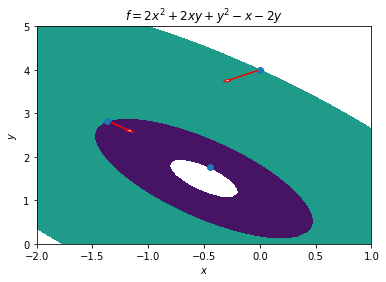

In [0]:
scale = 5
plt.plot(u[:, 0], u[:, 1], "o")
for t in range(iters-1):
    plt.arrow(*u[t], *(-df_t[t]*tau_t[t]/scale), head_width=0.05, ec="r", fc="w")

plt.contourf(x, y, f, levels=np.sort([fu(u[t]) for t in range(iters)]))
plt.title(r'$f = 2x^2 + 2xy + y^2 - x - 2y$')
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.xlim((-2, 1))
plt.ylim((0, 5))
plt.show()

## d

In [0]:
gradient_descent(0, 4, 100, 1e-6);

Initial point: [0, 4]
Root: [-0.49999999  1.49999998]
Min: -1.2499999999999998
Found after 5 iterations


# Problem 5
## a

In [0]:
from scipy.optimize import linprog

c = [1, 1]
A = [[-2, -1], [-2, -2], [-1, -2], [3, -1], [-1, 3]]
b = [-2, -3, -2, 6, 6]
x0_bounds = (None, None)
x1_bounds = (None, None)
result = linprog(c, A_ub=A, b_ub=b, bounds=[x0_bounds, x1_bounds])
print ('Minimum at:', result.x)

Minimum at: [0.75 0.75]


## b

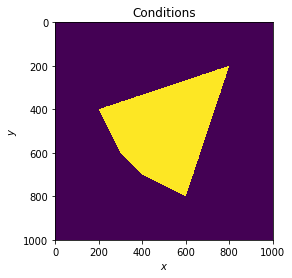

In [0]:
x = np.linspace(-1, 4, 1001)
x1, x2 = np.meshgrid(x, x)

xx0 = np.ones_like(x1).astype(bool)
xx1 = 2*x1 + x2 >= 2
xx2 = 2*x1 + 2*x2 >= 3
xx3 = x1 + 2*x2 >= 2
xx4 = 3*x1 - x2 <= 6
xx5 = 3*x2 - x1 <= 6

for xx in [xx1, xx2, xx3, xx4, xx5]:
    xx0 = np.logical_and(xx0, xx)

plt.imshow(xx0[::-1])
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.title('Conditions');

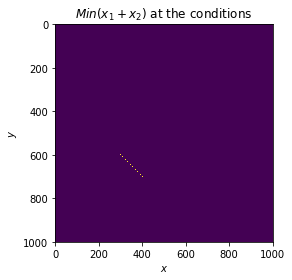

In [0]:
f_xx = x1[xx0] + x2[xx0]
x_min = np.min(f_xx)
x12 = x1+x2
xx12 = np.logical_and(xx0, x12==x_min)
points = np.where(xx12)
plt.imshow(np.logical_and(xx0, (np.abs(x12 - x_min) < 1e-2))[::-1]);
plt.xlabel(r'$x$')
plt.ylabel(r'$y$');
plt.title(r'$Min(x_1+x_2)$ at the conditions');

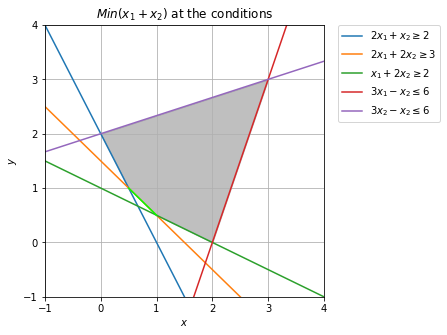

In [0]:
f = lambda x1, x2: x1 + x2
x1 = np.linspace(-5, 5, 2000)

x21 = 2 - 2*x1
x22 = 3/2 - x1
x23 = 1 - x1/2
x24 = 3*x1 - 6
x25 = 2 + x1/3

plt.figure(figsize=(5, 5))
plt.plot(x1, x21, label=r'$2x_1+x_2\geq2$')
plt.plot(x1, x22, label=r'$2x_1+2x_2\geq3$')
plt.plot(x1, x23, label=r'$x_1+2x_2\geq2$')
plt.plot(x1, x24, label=r'$3x_1-x_2\leq6$')
plt.plot(x1, x25, label=r'$3x_2-x_2\leq6$')
plt.xlim((-1, 4))
plt.ylim((-1, 4))
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')

plt.plot(x[points[0]],x[points[1]], "lime")

# Fill feasible region
y5 = x25
y6 = np.maximum(x21, x22)
y7 = np.maximum(x23, x24)
y8 = np.maximum(y6, y7)
plt.grid(True)
plt.fill_between(x1, y5, y8, where=y5>y8, color='grey', alpha=0.5)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title(r'$Min(x_1+x_2)$ at the conditions');

So, the min of (x1+x2) is a segment:
\begin{equation}
\begin{cases}
y = \frac{3}{2} - 2x,\\
x \in [0.5, 1]\\
y \in [0.5, 1]
\end{cases}
\end{equation}

# Problem 6
## a

In [0]:
from numpy.linalg import norm

In [0]:
xx = np.arange(1, 25).reshape(1, -1)
yy = np.array([75, 77, 76, 73, 69, 68, 63, 59, 57, 55, 54, 52, 50, 50, 49, 49, 49, 50, 54, 56, 59, 63, 67, 72]).reshape(1, -1)
x0 = np.array([1, 1, 1, 80]).reshape(-1, 1)
f = lambda abcd, xk, yk: norm(abcd[0][:, None]*xk**3 + abcd[1][:, None]*xk**2 + abcd[2][:, None]*xk + abcd[3][:, None] - yk, axis=1)
f_x = lambda abcd, xk: abcd[0][:, None]*xk**3 + abcd[1][:, None]*xk**2 + abcd[2][:, None]*xk + abcd[3][:, None]

In [0]:
m = 500 # number of generations, try also 2000
n = 200 # number of trials, try 200
n2 = 40 # number of trials to be kept, this must be n/5, try 40

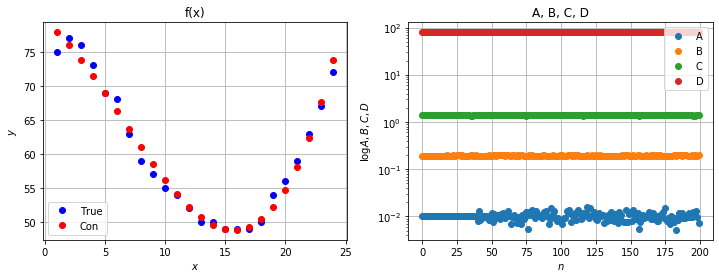

In [0]:
from IPython.display import clear_output

ABCD = x0 + np.random.randn(4, n)

start_time_2 = time.time()
for jgen in np.arange(m):
    E_loss = f(ABCD, xx, yy)
    E_indices = np.argsort(E_loss)
    ABCD_best = ABCD[:, E_indices[:n2]]
    
    ABCD_random = np.random.randn(4, 4, n2) / (jgen+1)
    ABCD_random += ABCD_best[None, :, :]
    ABCD = np.c_[ABCD_best, np.hstack(ABCD_random)]
    
    yfit = f_x(ABCD[:,:1], xx)
end_time_2 = time.time()

clear_output()
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(xx[0], yy[0], 'bo', label="True")
plt.plot(xx[0], yfit[0], "ro", label="Con")
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.title('f(x)')
plt.grid(True)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(np.abs(ABCD[0]), "o", label='A')
plt.plot(np.abs(ABCD[1]), "o", label='B')
plt.plot(np.abs(ABCD[2]), "o", label='C')
plt.plot(np.abs(ABCD[3]), "o", label='D')
plt.xlabel(r'$n$')
plt.ylabel(r'$\log{A, B, C, D}$')
plt.title('A, B, C, D')
plt.yscale('log')
plt.grid(True)
plt.legend()
plt.show()
plt.pause(0.5)

In [0]:
print (ABCD[:,0], res.x)
norm(res.x - ABCD[:,0])/norm(res.x)

[ 1.00890043e-02 -1.94094172e-01 -1.38932236e+00  7.94431076e+01] [ 9.18228205e-03 -1.59401226e-01 -1.75016904e+00  8.02379722e+01]


0.010885341655398886

## b

In [0]:
print ('scipy.optimize.minimize time:', round(end_time_1 - start_time_1, 5), 's')
print ('genetic algorithm time:      ', round(end_time_2 - start_time_2, 5), 's')

scipy.optimize.minimize time: 0.00406 s
genetic algorithm time:       0.1178 s


So, the scipy optimize algorithm is faster than the genetic one.